In [1]:
# import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense

#read the dataset
dataset = pd.read_csv('FinalOutput.csv')
dataset.head()

2023-05-12 16:57:21.351391: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-12 16:57:21.985827: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-12 16:57:21.990191: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 16:57:23.645488: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


,Mean_R,RMS_R,Median_R,Variance_R,Std_R,Skewness_R,Kurtosis_R,Contrast_R,Entropy_R,Energy_R,...,Skewness_B,Kurtosis_B,Contrast_B,Entropy_B,Energy_B,Homogeneity_B,Correlation_B,IDM_B,Smoothness_B,Label
0,0.499272,0.530498,0.521569,0.032156,0.179320,-0.484763,-0.322512,7.417660,956.450061,0.010660,...,-0.407196,-0.696663,7.517717,946.369715,0.011527,0.075315,0.824158,0.001056,0.014440,0
1,0.450862,0.493341,0.482412,0.040108,0.200270,-0.025098,-1.355651,7.058108,360.687224,0.015127,...,0.163490,-1.162955,7.040838,359.933441,0.015140,0.094008,0.919477,0.002771,0.005492,0
2,0.490711,0.529387,0.552941,0.039453,0.198628,-0.561403,-0.793254,7.469795,604.175751,0.010409,...,-0.467573,-1.005314,7.497503,601.133165,0.010352,0.060593,0.896033,0.001661,0.009172,0
3,0.456121,0.516174,0.470588,0.058389,0.241638,-0.111255,-1.422784,7.603757,787.841958,0.011805,...,-0.061711,-1.496490,7.352011,770.710692,0.018813,0.113546,0.885132,0.001296,0.011759,0
4,0.666764,0.680847,0.701961,0.018978,0.137762,-0.641985,-0.495426,6.970347,147.902145,0.018236,...,-0.336407,-1.415606,7.252476,151.646691,0.017100,0.140658,0.974893,0.006552,0.002314,0


In [2]:
#now read the number uniques values in Label
dataset['Label'].value_counts()

1    900
0    130
Name: Label, dtype: int64

In [3]:
#now clssify data into dependent and independent data
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [4]:
#classify data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


#scale the data
from sklearn.preprocessing import StandardScaler, Normalizer
sc = Normalizer()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# create the ANN model
model = Sequential()
model.add(Dense(4, input_dim=42, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, epochs=1000, verbose=0)

#model evaluation
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: {:.2f}%".format(accuracy * 100))

#predict results
pred = model.predict(x_test)


#now find accuracy
from sklearn.metrics import accuracy_score
print("The accuracy is ", accuracy_score(np.round(pred), y_test))


Accuracy: 86.08%
10/10 [==============================] - 0s 942us/step
The accuracy is  0.86084142394822


In [5]:
np.round(pred)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [6]:
print(y_test)

747    1
718    1
175    1
828    1
713    1
      ..
156    1
222    1
665    1
210    1
306    0
Name: Label, Length: 309, dtype: int64


In [7]:
#classification report
from sklearn.metrics import classification_report
report = classification_report(np.round(pred), y_test)
print(report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.86      0.93       309

    accuracy                           0.86       309
   macro avg       0.50      0.43      0.46       309
weighted avg       1.00      0.86      0.93       309



/home/uca/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/uca/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/uca/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

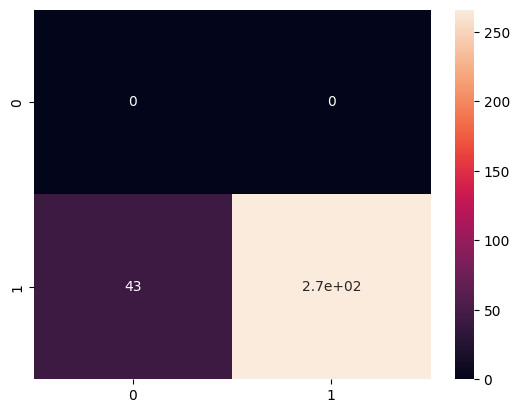

In [8]:
#now confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sb
cm = confusion_matrix(np.round(pred), y_test)
sb.heatmap(cm, annot = True)

[Text(0, 0.5, 'Health'), Text(0, 1.5, 'Unhealthy')]

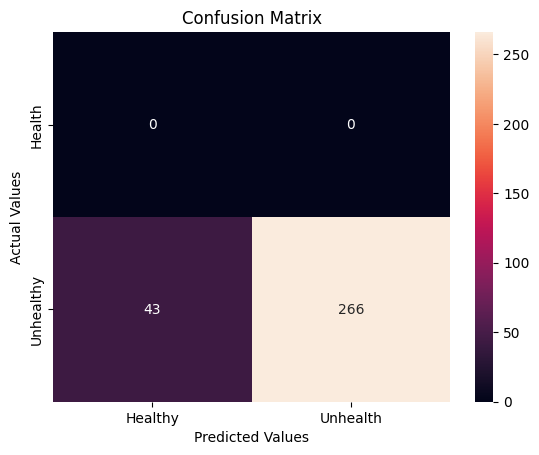

In [9]:
import matplotlib.pyplot as plt

ax= plt.subplot()
sb.heatmap(cm, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Values');ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['Healthy', 'Unhealth']); ax.yaxis.set_ticklabels(['Health', 'Unhealthy'])